In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1-remove or fill with missing values

2-transform categorical / ordinal into numerical values

3-deal with outliers


the mean value is set to 0 and the standard deviation is set to 1, bu datanin degil ama normal bir line iicn 

eger mean ve std degerleri yoksa standardization yapman lazim

*standardization: (her bir datapoint - mean) / standard deviation* - outlierlarin effectini indiriyor

*normalization: no more negative value everything is between 0 and 1*

(her bir data point - xmin) / (xmax -xmin): min-max normlaization - normalization helps with scaling but does not change the distribution, yani outliers duruyor. Normalization is useful when your data has few outliers but high variable ranges, income belki buna bir örnek olabilir


how do we choose between standardization and normalization?

In [7]:
# https://www.kaggle.com/muonneutrino/us-census-demographic-data
census = pd.read_csv('acs2015_county_data.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.dtypes

CensusId             int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
d

In [9]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3219.000000,3219.000000,3220.000000,3220.000000,3220.000000,3219.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,6.993507e+04,46129.868903,2850.395464,23981.771739,1362.518944,17.493261,24.180801,30.990621,18.346398,22.215807,12.714099,15.733385,79.181925,10.278758,0.971832,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,2.051189e+05,12911.297940,1918.942273,6204.339960,1049.875689,8.317883,11.698329,6.368379,3.635764,3.199682,4.216784,5.736308,7.657972,2.907897,3.059019,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+01,10499.000000,270.000000,5878.000000,113.000000,1.400000,0.000000,13.500000,5.000000,4.100000,1.700000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,8.450500e+03,38191.500000,1635.000000,20238.500000,755.000000,12.100000,16.300000,26.700000,16.000000,20.200000,9.800000,11.500000,76.600000,8.400000,0.100000,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,1.964300e+04,44749.000000,2406.000000,23460.000000,1096.500000,16.150000,22.700000,29.900000,18.100000,22.400000,12.100000,15.250000,80.700000,9.900000,0.400000,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,4.992050e+04,52074.000000,3446.000000,27053.250000,1631.000000,20.700000,30.000000,34.400000,20.300000,24.400000,14.900000,19.325000,83.700000,11.800000,0.800000,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,6.046749e+06,123453.000000,21355.000000,65600.000000,15266.000000,64.200000,81.600000,74.000000,38.200000,35.400000,40.300000,55.600000,94.600000,29.900000,61.700000,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [8]:
np.sum(census.isnull(), axis = 0)

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [10]:
census.dropna(inplace = True)

## Investigating the Income Variable in more detail

<AxesSubplot:>

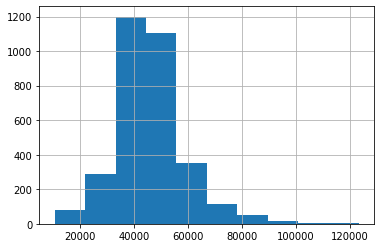

In [11]:
census['Income'].hist()

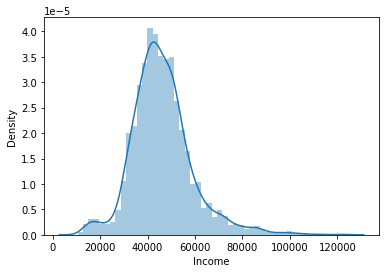

In [14]:
sns.distplot(census['Income'])
plt.show() # a little bit right skewed

<AxesSubplot:xlabel='Income'>

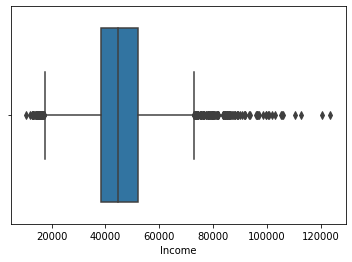

In [16]:
sns.boxplot(census['Income']) #there are big outliers

In [17]:
from scipy import stats
stats.describe(census['Income'])

DescribeResult(nobs=3218, minmax=(10499.0, 123453.0), mean=46123.61653200746, variance=166627556.71022704, skewness=0.9800252597216413, kurtosis=2.989010027545528)

skewness: 0 - normal distribution

skewness > 0 - right skewed, positive skewed

skewness < 0 - left skewed, negative skewed

kurtosis: 3 for normal distribution - positive higher than 3 tales are fatter than normal distribution ama burada sadece 3 den ne kadar yukarida oldugunu gösteriyor yani 3 + 2.98=5.98, both sides you have more mass.Yani line in kenarlarinda daha fazla veri var.Asimetri göstermiyor, extremelerde kac kisi var onu gösteriyor. Eger negative ise slim tails olucak.



# Some Options for Standardizing Data

### Dropping Outliers

In [20]:
iqr = np.percentile(census['Income'],75) - np.percentile(census['Income'],25)
upper_limit = np.percentile(census['Income'],75) + 1.5*iqr
lower_limit = np.percentile(census['Income'],25) - 1.5*iqr

#kicking outliers

In [24]:
income_pruned = census['Income'][(census['Income']>lower_limit) & (census['Income']<upper_limit)]

<AxesSubplot:xlabel='Income'>

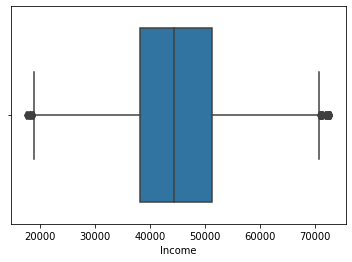

In [25]:
sns.boxplot(income_pruned)

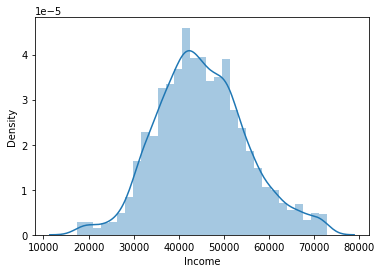

In [26]:
sns.distplot(income_pruned)
plt.show()

In [27]:
stats.describe(income_pruned)

DescribeResult(nobs=3057, minmax=(17423.0, 72807.0), mean=45077.55904481518, variance=99598221.73874097, skewness=0.2399643103433694, kurtosis=0.09000509982991556)

skewness close to 0 and kurtosis not so much far from 3

### Log Transformation

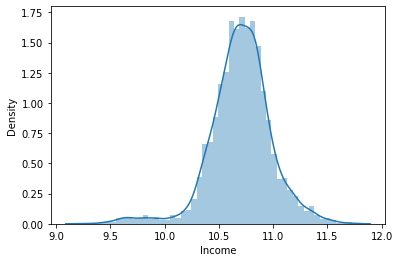

In [28]:
income_log = np.log(census['Income']) 
sns.distplot(income_log)
plt.show() #magnitude of the data will become much smaller

<AxesSubplot:xlabel='Income'>

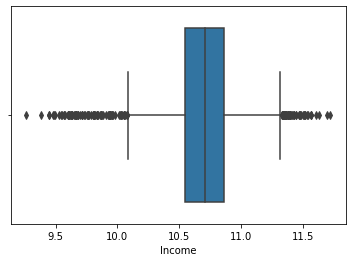

In [29]:
sns.boxplot(income_log)

In [30]:
stats.describe(income_log)
#kurtosis slightly decreased but not a lot, the data is left skewed now
#variance got smaller

DescribeResult(nobs=3218, minmax=(9.259035293514941, 11.723615795814627), mean=10.699868546760516, variance=0.082101734377845, skewness=-0.6368038704892826, kurtosis=2.659642086931661)

### Box Cox transformation

In [ ]:
help(stats.boxcox)

In [31]:
income_bc, lmbda = stats.boxcox(census['Income']) #makes it as close as possible to normal distribution
income_bc

array([210.56829028, 208.79720303, 175.05627624, ..., 135.25605397,
       127.99809011, 124.77589695])

In [32]:
stats.describe(income_bc)

DescribeResult(nobs=3218, minmax=(108.25313117480003, 303.66471853953067), mean=199.5538906500675, variance=542.4500136446337, skewness=0.07074711149069046, kurtosis=1.794840934902064)

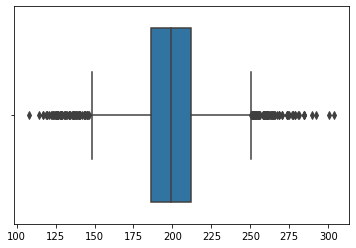

In [33]:
sns.boxplot(income_bc)
plt.show()

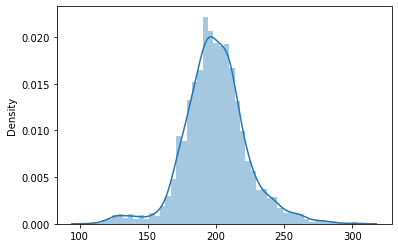

In [34]:
sns.distplot(income_bc)
plt.show()

### Scikit Learn StandardScaler
Standard Scaler changes each *feature column*. It transforms the data to have mean 0 and standard deviation 1 (e.g. normal distribution becomes a standard normal distribution). It is often used in classification problems. StandardScaler and other scalers that work feature-wise are preferred when you are interested in the relationship between different variables (for example head length and body length of crocodiles).

In [39]:
#standardization
from sklearn.preprocessing import StandardScaler
X = census.select_dtypes(include = np.number).dropna()
X.drop(columns = "CensusId",inplace=True)
# standardizing data
transformer = StandardScaler().fit(X)
X_standardscaler = pd.DataFrame(transformer.transform(X),columns=X.columns)

In [43]:
stats.describe(X_standardscaler["Income"])

DescribeResult(nobs=3218, minmax=(-2.760223662088807, 5.99154222000728), mean=2.87043367460575e-17, variance=1.0003108486167236, skewness=0.9800252597216412, kurtosis=2.989010027545528)

### Scikit Learn Normalizer

Normalizer changes each sample individually (!) and squeezes the values to be between 0 and 1.
This means that the distribution of the data at the *feature* level will change drastically. Normalizer and other scalers that work sample-wise should be preferred when you are interested in how one observation is linked to another, instead of exploring relationships between variables.

Example: when we are working with text data and are looking at the relationships between different documents, which is their topic, what are the word frequencies in each etc.

In [44]:
from sklearn.preprocessing import Normalizer
#help(Normalizer)

In [46]:
#normalization
X = census.select_dtypes(include = np.number)
X.drop(columns = "CensusId",inplace=True)
# Normalizing data
transformer = Normalizer().fit(X)
X_normalizer = pd.DataFrame(transformer.transform(X),columns=X.columns)

In [47]:
X_normalizer.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0.550294,0.266522,0.283772,0.000026,0.000755,0.000184,0.000004,0.000010,0.0,0.405837,0.511031,0.023827,0.248874,0.010763,0.000129,0.000185,0.000331,0.000169,0.000241,0.000086,0.000170,0.000872,0.000088,9.965312e-07,0.000005,0.000013,0.000018,0.000264,0.239028,0.000733,0.000208,0.000055,0.000000,0.000076
1,0.651876,0.318432,0.333443,0.000015,0.000278,0.000032,0.000002,0.000002,0.0,0.493431,0.167893,0.004220,0.091263,0.002375,0.000045,0.000064,0.000111,0.000059,0.000091,0.000036,0.000037,0.000283,0.000029,3.340879e-07,0.000003,0.000005,0.000013,0.000088,0.287159,0.000272,0.000041,0.000019,0.000001,0.000025
2,0.493997,0.265909,0.228087,0.000084,0.000847,0.000857,0.000004,0.000007,0.0,0.379944,0.604638,0.054532,0.308592,0.014637,0.000490,0.000831,0.000492,0.000295,0.000424,0.000198,0.000424,0.001537,0.000200,7.336950e-06,0.000033,0.000028,0.000029,0.000442,0.157689,0.001317,0.000382,0.000134,0.000002,0.000323
3,0.412914,0.220541,0.192373,0.000040,0.001361,0.000391,0.000007,0.000002,0.0,0.319586,0.706543,0.072978,0.336685,0.029556,0.000307,0.000510,0.000393,0.000327,0.000325,0.000347,0.000433,0.001520,0.000247,9.133648e-06,0.000011,0.000027,0.000013,0.000526,0.151509,0.001403,0.000294,0.000122,0.000007,0.000152
4,0.582598,0.287836,0.294762,0.000087,0.000887,0.000015,0.000003,0.000001,0.0,0.427484,0.462495,0.031709,0.207276,0.007147,0.000169,0.000275,0.000288,0.000142,0.000241,0.000136,0.000201,0.000857,0.000113,4.038110e-06,0.000009,0.000004,0.000023,0.000352,0.224004,0.000828,0.000136,0.000042,0.000004,0.000078


In [49]:
stats.describe(X_normalizer["Income"])

DescribeResult(nobs=3218, minmax=(0.0038851196681376665, 0.9393222684143885), mean=0.5919084970383909, variance=0.06781468177577717, skewness=-0.6798525733307703, kurtosis=-0.8299565257787118)

### Other options: Creating a categorical variable out of a numerical one

In [55]:
census['IncomeRange'] = pd.cut(census.Income, 3) 
census.IncomeRange.value_counts() #numerical datadan categori yaratiyor

#equal width bins: age min 30 and max 60
#total range=60-30
#3bins,equal width:each bin is 10 wide
#low bins:[30-40]
#mid bins: [40-50]
#high bins : [50-60]

(10386.046, 48150.333]    1984
(48150.333, 85801.667]    1193
(85801.667, 123453.0]       41
Name: IncomeRange, dtype: int64

In [51]:
census['IncomePercentile'] = pd.qcut(census.Income, [0, 0.3333, 0.6666, 1]) #so you make for every 33%
census.IncomePercentile.value_counts()

#equal width degil, equally size buckets yaratiyor. 30-40,40-50-50-60 degilde equally size buckets yaratacak

(10498.999, 40630.0]     1074
(49733.809, 123453.0]    1073
(40630.0, 49733.809]     1071
Name: IncomePercentile, dtype: int64

In [56]:
census['HighUnemploymentLowIncome'] = np.where((census.Unemployment > 0.07) & (census.IncomePercentile.cat.codes == 0), 1, 0) 
census.HighUnemploymentLowIncome.value_counts()

0    2145
1    1073
Name: HighUnemploymentLowIncome, dtype: int64

### Checking Correlations

<AxesSubplot:>

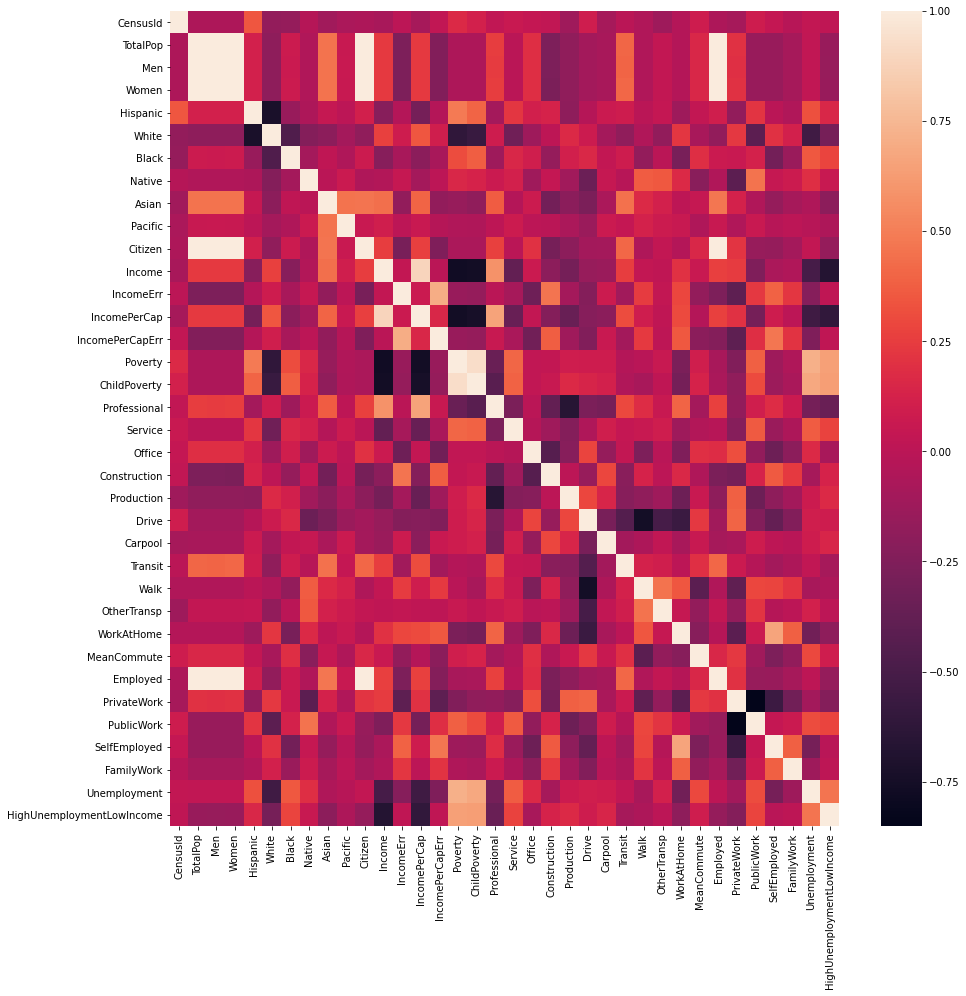

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(census.corr())

Features with high correlation:
- TotalPop, Men and Women, and Citizen and Employed
- Poverty and ChildPoverty
Remember: we want high correlation with the target variable, but low correlation of the features to one another!

### Encoding Categorical Variables

In [99]:
# extracting only categorical variables
cat = census.select_dtypes(include = 'object') # only object type, number icin np.number
print(cat.columns)

Index(['State', 'County'], dtype='object')


In [100]:
cat.dropna(inplace=True)

In [63]:
#cat['State'].value_counts()

#### LabelEncoder

In [62]:
# encoding one variable at a time
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(cat['State']) #df deki son eyalet 39 no aldi, alfabetik olarak siraladi cünkü

array([ 0,  0,  0, ..., 39, 39, 39])

In [66]:
print(le.classes_)
print(le.transform(le.classes_))
dict(zip(le.classes_, le.transform(le.classes_)))


#51 tane eyalet var hepsi bir encoded number aliyor ama dikkat et bunu önce alfabetik olarak siralayarak yapiyor

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]


{'Alabama': 0,
 'Alaska': 1,
 'Arizona': 2,
 'Arkansas': 3,
 'California': 4,
 'Colorado': 5,
 'Connecticut': 6,
 'Delaware': 7,
 'District of Columbia': 8,
 'Florida': 9,
 'Georgia': 10,
 'Hawaii': 11,
 'Idaho': 12,
 'Illinois': 13,
 'Indiana': 14,
 'Iowa': 15,
 'Kansas': 16,
 'Kentucky': 17,
 'Louisiana': 18,
 'Maine': 19,
 'Maryland': 20,
 'Massachusetts': 21,
 'Michigan': 22,
 'Minnesota': 23,
 'Mississippi': 24,
 'Missouri': 25,
 'Montana': 26,
 'Nebraska': 27,
 'Nevada': 28,
 'New Hampshire': 29,
 'New Jersey': 30,
 'New Mexico': 31,
 'New York': 32,
 'North Carolina': 33,
 'North Dakota': 34,
 'Ohio': 35,
 'Oklahoma': 36,
 'Oregon': 37,
 'Pennsylvania': 38,
 'Puerto Rico': 39,
 'Rhode Island': 40,
 'South Carolina': 41,
 'South Dakota': 42,
 'Tennessee': 43,
 'Texas': 44,
 'Utah': 45,
 'Vermont': 46,
 'Virginia': 47,
 'Washington': 48,
 'West Virginia': 49,
 'Wisconsin': 50,
 'Wyoming': 51}

In [67]:
print(le.transform(['Wyoming']))
print(le.inverse_transform([51]))

[51]
['Wyoming']


The **LabelEncoding** method will create a column which contains all the numerical values, where each number is mapped to a certain category. ML models will be able to deal with this, since now we are looking at a numerical column - on the down side, algorithms might interpret it as a numerical (linear) variable instead of a categorical. Another approach is OneHotEncoding, which will gives us dummies for each variable separately.

#### OneHotEncoding

In [101]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(cat).toarray())

#cat is the categorical variables data

In [102]:
enc_df.head() #1 dummy for each state and 1 dummy for county

0     1     2     3     4     5     6     7     8     9     10    11    \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 

In [103]:
enc_df.sum(axis = 1)

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
5       2.0
6       2.0
7       2.0
8       2.0
9       2.0
10      2.0
11      2.0
12      2.0
13      2.0
14      2.0
15      2.0
16      2.0
17      2.0
18      2.0
19      2.0
20      2.0
21      2.0
22      2.0
23      2.0
24      2.0
25      2.0
26      2.0
27      2.0
28      2.0
29      2.0
30      2.0
31      2.0
32      2.0
33      2.0
34      2.0
35      2.0
36      2.0
37      2.0
38      2.0
39      2.0
40      2.0
41      2.0
42      2.0
43      2.0
44      2.0
45      2.0
46      2.0
47      2.0
48      2.0
49      2.0
50      2.0
51      2.0
52      2.0
53      2.0
54      2.0
55      2.0
56      2.0
57      2.0
58      2.0
59      2.0
60      2.0
61      2.0
62      2.0
63      2.0
64      2.0
65      2.0
66      2.0
67      2.0
68      2.0
69      2.0
70      2.0
71      2.0
72      2.0
73      2.0
74      2.0
75      2.0
76      2.0
77      2.0
78      2.0
79      2.0
80      2.0
81      2.0
82      2.0
83  

In [104]:
# merge with main df bridge_df on key values
cat = cat.join(enc_df)
cat.head()

State   County    0    1    2    3    4    5    6    7    8    9   10  \
0  Alabama  Autauga  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  Alabama  Baldwin  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  Alabama  Barbour  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  Alabama     Bibb  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  Alabama   Blount  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    11   12   13   14   15   16   17   18   19   20   21   22   23   24   25  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    26   27   28   29   30   31   32   33   34   35   36   37   38   39   40  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    41   42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    56   57   58   59   60   61   62   63   64   65   66   67   68   69   70  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    71   72   73   74   75   76   77   78   79   80   81   82   83   84   85  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    86   87   88   89   90   91   92   93   94   95   96   97   98   99  100  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0

In [109]:
cat.dropna(inplace=True)

#### Get Dummies

In [61]:
pd.get_dummies(cat, columns=['State']).head()

,County,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Puerto Rico,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,Autauga,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baldwin,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barbour,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bibb,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Blount,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Storing models, encodings etc: Pickle

In [110]:
import pickle #store procedures
pickle.dump(enc, open('encoding_state.pkl','wb'))
# Pickle module uses binary protocol (wb stands for write binary)

In [ ]:
help(pickle.dump)

In [111]:
model = pickle.load(open('encoding_state.pkl','rb'))

In [112]:
model

OneHotEncoder()

In [113]:
model.fit_transform(cat)

<3216x5930 sparse matrix of type '<class 'numpy.float64'>'
	with 6367680 stored elements in Compressed Sparse Row format>

In [114]:
pd.DataFrame(model.fit_transform(cat).toarray()).head()

0     1     2     3     4     5     6     7     8     9     10    11    \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 